In [2]:

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
employee_data = pd.read_csv(r'C:\Users\Shreyansh Mishra\Desktop\sentiment analysis\data\cleaned_data\IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [4]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [5]:

employee_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,...,Excellent,Low,0,6,3,Best,4,3,1,2


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)


The shape of data frame: (1470, 31)


In [7]:
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))


Number of Rows in the dataframe: 1470


In [8]:
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

Number of Columns in the dataframe: 31


In [9]:
# Convert categorical variables into numerical form. 
label = LabelEncoder()
employee_data["Attrition"] = label.fit_transform(employee_data.Attrition)

In [10]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [11]:
# Transform categorical data into dummies
dummy_col = [column for column in employee_data.drop('Attrition', axis=1).columns if employee_data[column].nunique() < 20]
data = pd.get_dummies(employee_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [12]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

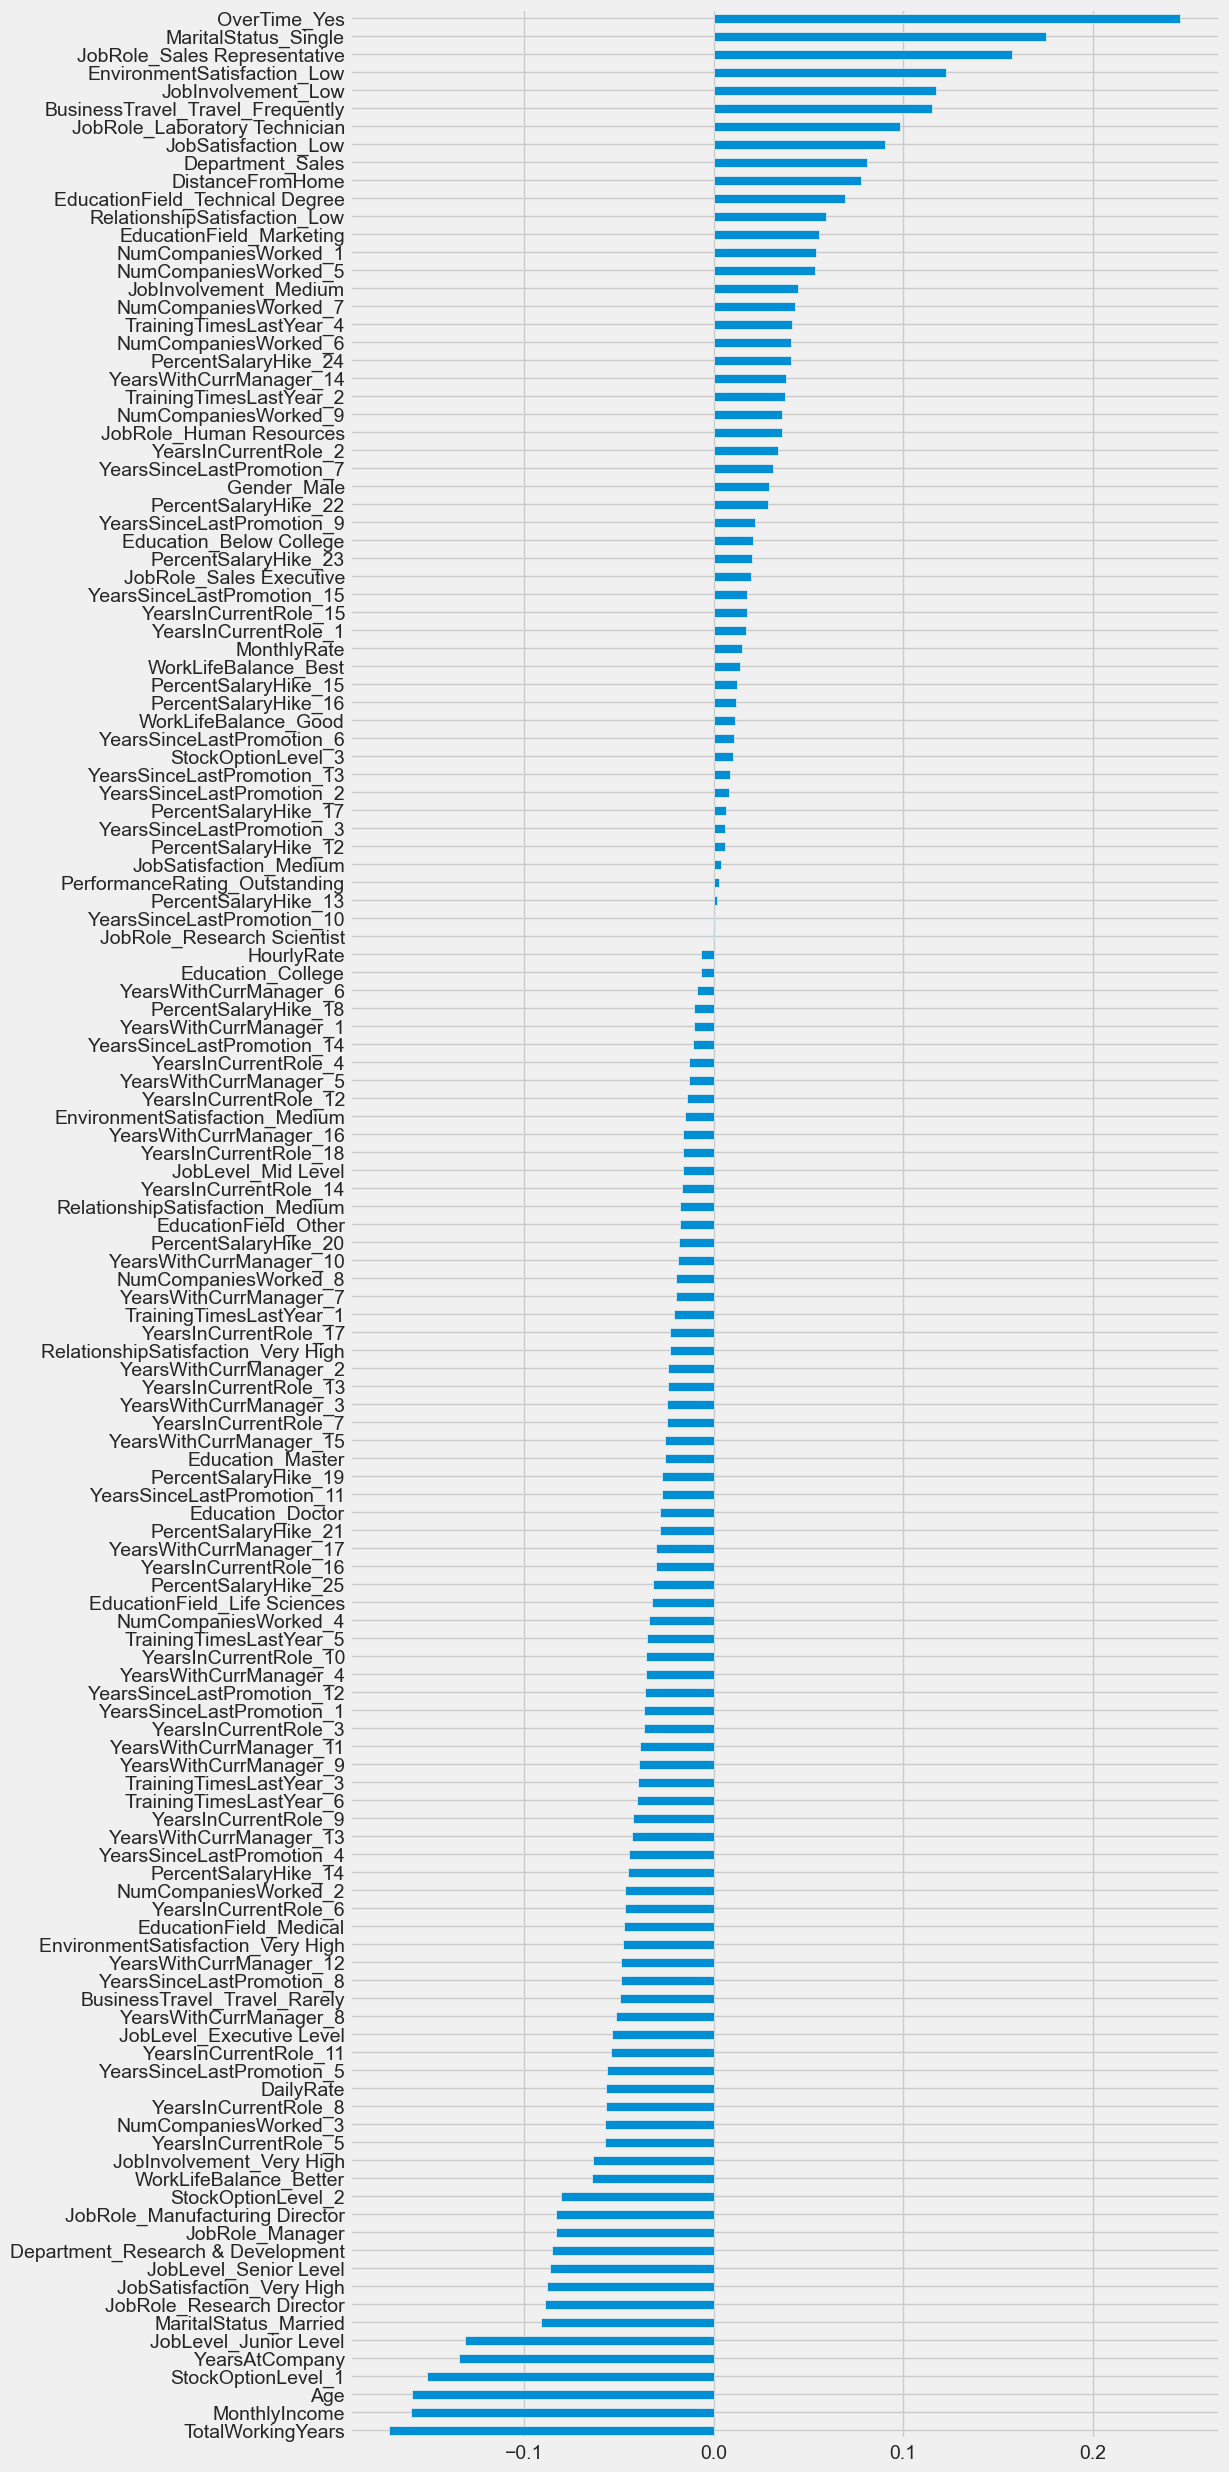

In [13]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [14]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

In [15]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [16]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [17]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8390022675736961)

In [18]:
stay = y_train.value_counts()[0] / len(y_train)
leave = y_train.value_counts()[1] / len(y_train)

print("Training Set")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100:.2f}%")

stay = y_test.value_counts()[0] / len(y_test)
leave = y_test.value_counts()[1] / len(y_test)

print("Test Set")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100:.2f}%")


Training Set
Staying Rate: 83.87%
Leaving Rate: 16.13%
Test Set
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [19]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [20]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced')
lr_clf.fit(X_train_std, y_train)


evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[736 127]
 [ 15 151]]
ACCURACY SCORE:
0.8620
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.980027    0.543165  0.862002     0.761596      0.909551
recall       0.852839    0.909639  0.862002     0.881239      0.862002
f1-score     0.912020    0.680180  0.862002     0.796100      0.874619
support    863.000000  166.000000  0.862002  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[302  68]
 [ 22  49]]
ACCURACY SCORE:
0.7959
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.932099   0.418803  0.795918    0.675451      0.849459
recall       0.816216   0.690141  0.795918    0.753179      0.795918
f1-score     0.870317   0.521277  0.795918    0.695797      0.814122
support    370.000000  71.000000  0.795918  441.000000    441.000000


In [21]:
# -------------------------
# Option 1: Use original training data (no resampling)
# -------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

# -------------------------
# 1️⃣ Define hyperparameter grid
# -------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}

# -------------------------
# 2️⃣ GridSearchCV setup
# -------------------------
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring='roc_auc',  # use ROC AUC for imbalanced dataset
    cv=5,
    n_jobs=-1
)

# -------------------------
# 3️⃣ Fit on original training data (X_train_std, y_train)
# -------------------------
grid_search.fit(X_train_std, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# -------------------------
# 4️⃣ Predict probabilities on test set
# -------------------------
y_test_prob = best_lr.predict_proba(X_test_std)[:, 1]  # probability of leaving (class 1)

# -------------------------
# 5️⃣ Threshold tuning for balanced macro-F1
# -------------------------
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0

for thresh in np.arange(0.3, 0.7, 0.01):
    y_pred_temp = (y_test_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_temp, average='macro')  # macro-F1 balances both classes
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Optimal threshold for balanced F1: {best_thresh:.2f} (F1_macro: {best_f1:.2f})")

# Use optimal threshold
y_test_pred_balanced = (y_test_prob >= best_thresh).astype(int)

# -------------------------
# 6️⃣ Evaluation
# -------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Threshold used: {best_thresh:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_balanced):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_balanced))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_balanced))

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0

for thresh in np.arange(0.3, 0.7, 0.01):
    y_pred_temp = (y_test_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_temp, average='macro')  # macro-F1 balances both classes
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Optimal threshold for balanced F1: {best_thresh:.2f} (F1_macro: {best_f1:.2f})")


In [ ]:
# Use optimal threshold
y_test_pred_balanced = (y_test_prob >= best_thresh).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Threshold used: {best_thresh:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_balanced):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_balanced))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_balanced))


In [ ]:
# -------------------------
# 0️⃣ Imports
# -------------------------
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE  # Need to install: pip install imbalanced-learn

# -------------------------
# 0.5️⃣ Create resampled training data (MISSING STEP!)
# -------------------------
# Apply SMOTE to create X_train_res and y_train_res
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_std, y_train)

print("Data resampling completed:")
print(f"Original training set shape: {X_train_std.shape}")
print(f"Resampled training set shape: {X_train_res.shape}")
print(f"Original class distribution: {np.bincount(y_train)}")
print(f"Resampled class distribution: {np.bincount(y_train_res)}")
print("-" * 50)

# -------------------------
# 1️⃣ Scaling features
# -------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_res)  # resampled training set
X_test_scaled = scaler.transform(X_test_std)        # original test set

# -------------------------
# 2️⃣ GridSearchCV for Logistic Regression
# -------------------------
param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 10],  # include slightly stronger regularization
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring='f1_macro',  # optimize balanced F1
    cv=5,
    n_jobs=-1
)

print("Starting GridSearchCV...")
grid_search.fit(X_train_scaled, y_train_res)
best_lr = grid_search.best_estimator_
print("GridSearchCV completed!")

# -------------------------
# 3️⃣ Predict probabilities on test set
# -------------------------
y_test_prob = best_lr.predict_proba(X_test_scaled)[:, 1]  # probability of leaving

# -------------------------
# 4️⃣ Threshold tuning for balanced macro-F1
# -------------------------
print("Finding optimal threshold...")
best_thresh = 0.5
best_f1 = 0

for thresh in np.arange(0.3, 0.7, 0.01):
    y_pred_temp = (y_test_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_temp, average='macro')
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Optimal threshold for balanced macro-F1: {best_thresh:.2f} (F1_macro: {best_f1:.2f})")

# -------------------------
# 5️⃣ Final predictions using optimal threshold
# -------------------------
y_test_pred_balanced = (y_test_prob >= best_thresh).astype(int)

# -------------------------
# 6️⃣ Evaluation
# -------------------------
print("\n" + "="*60)
print("FINAL MODEL EVALUATION RESULTS")
print("="*60)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Threshold used: {best_thresh:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_balanced):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_prob):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_balanced))

# -------------------------
# 7️⃣ Optional: CV check for robustness
# -------------------------
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_lr, X_train_scaled, y_train_res, cv=5, scoring='f1_macro')
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)
print("Cross-validation Macro F1 scores:", cv_scores)
print("Mean CV Macro F1:", cv_scores.mean())
print("Std CV Macro F1:", cv_scores.std())

In [ ]:
# =========================================================================
# RUN THIS IN THE SAME NOTEBOOK WHERE YOU TRAINED THE MODEL
# =========================================================================
import os
import pandas as pd
import joblib

# Create folders in current directory (notebooks folder)
os.makedirs('../test_data', exist_ok=True)  # Go up one level to project root
os.makedirs('../models', exist_ok=True)

print("Checking variables...")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X columns: {len(X.columns)}")

# =========================================================================
# SAVE TEST DATA
# =========================================================================
# Get predictions and probabilities for test set
y_test_prob = best_lr.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_prob >= best_thresh).astype(int)

# Create test dataset with predictions
test_results = pd.DataFrame(X_test_scaled, columns=X.columns)
test_results['Actual_Attrition'] = y_test.values
test_results['Predicted_Attrition'] = y_test_pred
test_results['Risk_Score'] = y_test_prob

# Save test data
test_results.to_csv('../test_data/test_data_with_predictions.csv', index=False)
print("✅ Saved: test_data/test_data_with_predictions.csv")
print(f"📊 Test data shape: {test_results.shape}")

# =========================================================================
# SAVE MODEL COMPONENTS
# =========================================================================
# Save the trained model
joblib.dump(best_lr, '../models/attrition_model.pkl')
print("✅ Saved: models/attrition_model.pkl")

# Save the scaler
joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Saved: models/scaler.pkl")

# Save feature columns
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, '../models/feature_columns.pkl')
print("✅ Saved: models/feature_columns.pkl")

print("\n🎉 All files saved successfully!")
print("Ready for prediction pipeline!")

In [ ]:
# =========================================================================
# SAVE TO EXISTING DIRECTORY STRUCTURE
# =========================================================================
import os
import pandas as pd
import joblib

# Use your existing directory structure
# From notebooks folder: go up one level, then into data/test_data
test_data_path = '../data/test_data'
models_path = '../models'  # models stays at root level

# Ensure directories exist (they should already exist based on your structure)
os.makedirs(test_data_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)

print(f"Saving to existing directories:")
print(f"Test data: {test_data_path}")
print(f"Models: {models_path}")

# =========================================================================
# SAVE TEST DATA TO data/test_data
# =========================================================================
try:
    # Get predictions
    y_test_prob = best_lr.predict_proba(X_test_scaled)[:, 1]
    y_test_pred = (y_test_prob >= best_thresh).astype(int)
    
    # Create DataFrame
    test_results = pd.DataFrame(X_test_scaled, columns=X.columns)
    test_results['Actual_Attrition'] = y_test.values
    test_results['Predicted_Attrition'] = y_test_pred
    test_results['Risk_Score'] = y_test_prob
    
    # Save to your existing data/test_data folder
    test_file_path = os.path.join(test_data_path, 'test_data_with_predictions.csv')
    test_results.to_csv(test_file_path, index=False)
    print(f"✅ Saved: {test_file_path}")
    
    # Show some stats
    high_risk_count = len(test_results[test_results['Risk_Score'] >= best_thresh])
    print(f"📊 Total test employees: {len(test_results)}")
    print(f"📊 High-risk employees: {high_risk_count}")
    
except Exception as e:
    print(f"❌ ERROR saving test data: {e}")

# =========================================================================
# SAVE MODEL COMPONENTS TO models
# =========================================================================
try:
    # Save model
    joblib.dump(best_lr, os.path.join(models_path, 'attrition_model.pkl'))
    print(f"✅ Saved: {models_path}/attrition_model.pkl")
    
    # Save scaler
    joblib.dump(scaler, os.path.join(models_path, 'scaler.pkl'))
    print(f"✅ Saved: {models_path}/scaler.pkl")
    
    # Save feature columns
    feature_columns = X.columns.tolist()
    joblib.dump(feature_columns, os.path.join(models_path, 'feature_columns.pkl'))
    print(f"✅ Saved: {models_path}/feature_columns.pkl")
    
except Exception as e:
    print(f"❌ ERROR saving model: {e}")

print("\n🎉 Files saved to your existing directory structure!")
print("Now you can delete the incorrectly created test_data folder at the root level.")